In [1]:
%matplotlib inline
import re
import getpass
import gmaps
import requests
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
from urllib.parse import urljoin
from IPython.display import clear_output, display
from parse import parse
import yaml
import time
import os
import sys
import pandas as pd
import xarray as xr
from shapely.wkb import loads
from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry.point import Point
from shapely.ops import cascaded_union
import numpy as np
import matplotlib.pyplot as plt

import psycopg2
import json
from fabric2 import Connection

#adding prognos tools
sys.path.insert(0, "../../PROGNOS/")
from prognos_tools.encrypt import decryptString
from prognos_tools.Basin_fabric2 import Basin


storageToken=b'gAAAAABdiMKRN9CAWkwJjaORtRqmHmoAqR8j02XBp5PA18aPsIGdyMDAXN-pTYBjNAr0AaoZ6-kO2kS5x4fbFJFOZhk298W518PEhgQNIkot-dkCJfgk369_AEHoOtqUd84hnrpO5v1a58mu9VGA74KwEpEk3mDEdkZVPffPgK1y5B8Gp_s9_iqvPKP8EC4M-i1CVIhRIOVGEK4udkY-BYP-B20tYHarrbAigGwxeFxfpnSBQKUOtu4poU0GuJT0CLY7VUhqFb-0qTWQBmWqRg1e98_uMedZbGPjNKx1RAg7Z43-yb3M3OSFcaniRtXvzS5ScmVbsRuEWU2bR2hn2HWZY6m5oZdQPBWCoAknelAu7F3nMH3o-hGUciVDVaRGwGiD2qauyoPcbP0oP9kvjwSsysyFsomiRpewpaAkr2O85i0mXvehvGMMDZAKVFrCwJbXHR598ccCOp28Jo2-N91vadryW_-isdXF4vxKrlPwNDTqvy3m9WoxoeS98X5Z8U1cfbjVpy-UAzB16IzkivdkeOAteM_J6lZq2H5pnbG1TeF_f2kd3ul1FKV9xZGVxaBvT0G-YxjHM6HpYQn9O8rC_DfJUunoFToZp3VvG6hcTKjOl2inbaqqhcQ4RhavCymFFkR1FeMQ_2scNJcpiGUkI3GPGV7ujPlSpXVMkEViitT89thIIwsFL0IWvctJE35j42HArPhcEvvYWKBypt2Ok1jnVTNx7Vp4dE7V5HuXvkg65tjeHu2EFBVaIomhTdnqa2dUZ0Rj4F09J8s7NWA965V__LIp-30pSJaLKwAoRVs3DrkF11aV5EURNZyryXi6YwrLPCV5TodKvCmbCS-t1EVDpd50MX4KJErtuTAESvOQZTdFPMF0lR7ivMmc39luDOtSHupg0IiOqVaUVpw7GEF0FX4o4RZ61D4dx2xQ6nDBm0nyxOphGzkbHIGZmj9AnxTqVMDxfrFz9Edr2FBL4i3tORtIdGS_iDbiJvXm3fl1oYqe3bNqt_U-PKzlP9AXpsEkxyDPr6cNBqOE5coSFh9w1rJXfcdyQPt1p-57JydFQJmx2KvRmeYzXuruI1etqDF9eUzVVzC2GZfA__39-JFZMUDtNGsAwywbV6VB-xaNSi85wy7rjIitnWvo5tjqo1H8Hr-OFhrgvfKiXpWEF1_lBNIWqAnmPME8s-5CXIphMqKndp2ShMERviQX8C5aUosx3aIbnUboaUjxlIjiwCb1oXM_1_SRdoMmhKY87DibiRBJF_z1ouKmPnlUg-SAKYqh307Wd839PhlnxN8srVv8TdP7TkGlHZ_SoX6luloHB33Ejjuak0b0jG6o4yfyYgXHDDVkNRE7myeMhH4PKNqbLnG1USHxxsbT63h5R3LDwpU1MzjaGfEL3Mf86mTH6gsapWbImhtqlE1Orjq8Igx0O7tILowUBjmdBXcQw5Q4rhwe2ik-e18HnLycqCbq1ATcf2ldBmjpawzXUNVvZgqMq57eTraKgdM338gRT62Y2rVBZeFTURp-IIdN5NoWxBGnzFwyYPdq9aVXKtue9cDgeTHh3oP6lI9edu-baeGHi0bMzqPZppuht0-gZ1vVnEjapoMfj6hiqlfWUyG7Y4RqjQGabzAYxam0BhDXpSfvvoQCat02IyUG93d4gQQEjsyPQuVxV5pgKNA9YO99TqnKac2Xkr-zlqQyFe4J2NzkqDb-XSQXjOv2zkXaUZdFp54KnAb1iuc_tOgHZwpeMb_AkG9K_ACX2x7arG5slhNlUu-UXfLL5K9GdGXGQYJllyW3HTfi3ZjJthHn16fjMoxmzJU-qzqoKTT8HuU3sY9LLzKQJmlhpE915RDOsSlI6-znbTrqfGz_bm2putOb38HrH5i7ptR-ofCtblFa_jpYTx2R_A-2LSIokfOknXY7WPGciDY7YUzC_mz0SJYtNfQxF4ny6hKHVVh2Rt2XeP6-NsIqUaYrEDiFTz-kvXMA9MUQ70_z67oKr8dp8PK-kSPE_wdnjS1cUFVB1hhTm8HNsKqDNNB5byk7QN0GuTYXNk0hxKJK3i32UMclD8lLAP8Pa_nY4J47q84f3XSkNxJ571Lnr7RXSV88u3T6qnXWv0ciG4PAxXVwD_X2qpEY8-SyQqny2Yxw7xPbdwa7h6DrzXlzrk2pvI9KhEGuLtWMxiPOxiitDg0FEFJSHbfXZHKtqtFemav19nNrcBN-VbGLCt_bBVV4uuMs3W7nv-Y7MKFpKzQVdqYHbgbtSE3rgXQyLL_OirmxaBJz-DQXdystdR4epjtd1LNN8VXwnRv5Ln6siPPCy-QPp-ITKWe-ACsS3t3gIxTjgMpTVBbYp40OHfMwhk2iHDTA-DFlrilepwH8TWZG4LVl5fwHmv_rTpb_K01kv2_wAHZjCsNCtfTMiNjZTYepp3w_MbTG1KnV21L7UCi8ktj55W4vu4sh8REqiGfYDFhPJ444dae_-Wg_UdBwVrJtRWlPUW_m8V4kOgusQSgHPZCXR_SLAxWvbxd1MkzcXbIaCTj2hsseQFx3kUmNDj911E7rV1RbLRzaIFx6Weffy0U8mvrBh8kfZuHk8hAksdD-Ke4JC25ucn36y8MjGkV_bWf-h6I-2eijxg7da-3-R6EtPp8goTIkiFTO8IK84PEFnODhBvdGTYR81zMBmaYWnD3Ir0LZE4dGVc9jFYk22fZJ56httDKR130AsZ1B-nqlsfn-n9plJKoKWVjYLnfAI2TgOCndQCJ2fxkbjfS0x7eKCysUEijLX8vAqhwHCZOasikFlMGxmlHF-Ph_WunExoWhoxlvzP6FDny-0poTkllSRt9KN6rHn5rzqzxS-fSxW6GLnSn8Y7TsGpy0tn_KMRsGV5xbDJWFFMnvMf7hB1L9_Ut9fvzsX3Iz-O1ktqWnNQwBKi-MsFePpIXtKA4U8KQrWBf6TyASoqw79xVdlqbXwzYfg9Ur_kYh7nHXYKwP4oy2agTdYRzUydWi819NmgW_QFp72aUMGAKCxy5MpxJMDR_41OkQxyjuPHT_3HskCFjdcvUOgp0Hi8m-iU5D34PaVeGisC2H-rbyaS_ET3PtJ0kU1Xx3oF2xYM1q-4QB9qBxUyDdk5hBNxaoAslA8sE_Y1JfMzfyjIqK4OR5_noBkksj_f7tlezivS8eKmhClnSGboQVS5ypcEw5n8d-XQh8C58qKmQ2jUZOYyt6WBAD-TfzyqPxDX423z-Cuw=='
computeToken=b'gAAAAABdiMIg9OCnTJ3gsI_ZGqzRz2jbkLvVHtvw8stG7ljodd08gXOQFYuiclCtsPkSLgwvMiuro1QZw_8Y8txjIPBVOI313SGpfNj5UtfG1jZbNeMDMHJXz3w_be3a6JjsLJtXSmFNYrTKUJKioomQuugq0dI8oIgqQ5MrAx8hOheG1BB0lxW20UzE5W2izjXLqGhtBGQJVrvvt7j1-GFcDu-FvSEik4JQQK9miOJlfNfPUhY5wagCcC_FLmdc_9vmBVo7xprhGkQjFmO_EbQJVkNIteE0QWt77x2zPkuOowyMxfDAP9KyOte2q5vrrX27InZ4OXNdoAP56kFYJ0dvqiq7vkPK2cliroFo3fDgm-SyPxZx4S37ga8aOanpESKpKZke7ea-EQoAOQqGGk9OA8tVDa2kJNvZEoZLa0xPI1rBiMPna3PWHoinfO0C3ohuDYIUPYKWNrymNmrNvdtkUMD9COvAWGP-wEZ7S7iZN9NlBJ_uUmFVpTNGVwBrGCebxW3byN5CSxQ7zKHuvlWI0-sggUph58lTYq1FThwZ2YM0hPDmO4Wvlefneyf3OYAURfAjU4Z9v8SZc2EUgb8jHLscTwY1hQWdVFDEgxFJ2vLOXX3yvfPfzNw0Fz9OlU2hwLqyZNYE7XoZaC2A2ndl9OjsKalqeyAmUoyRx-EN1IAMt-cvMwCXCiCzKgu1tmObye_evqcW2KRZ2hgvUBXWX_gtqDLa9RumxnKw9mw8aTfqoCumK74Vr9c4L6csJOkJyoZCDeKyfvMRgIPnFR4GThTZjdBRE4jMFnPV5I_pjcfNSX8gEXoKuH7pcWSMmSUZ2-IPTZeJVBT4yFpamKuYhao67ZVOCeIg0RTwnywuQZK3VGNqL0c27z_L_Y7uW-T0MV-Z8wv0hxqOT5JQ_xl_OIVGCUitQRnrN_ZIECIr6lpdhYk8HH73yOGKGtR6lMFK7ww99z4fWFl5X0opYrbMpI5dJ8kxB7u85escismPL2FFvib4s69hzBPAdXVaos2j1aquixf3pYIOOtnQE1_H0-JHZnmtfg4SBIUvyFVeWpxgBfcgvS-3YiUJLf5BU9hiSYLMMzIJbQspKz_qh3rrcYwvYEyUffrqD2p-62D95YqL4SNtO0l9nnzCZ909b1sddEoF1W_qjxNFc92G3B0tqC8vgEp_3Ec1b3A8fPAmSHV1MEXfEhPLha_OUiKLA8tGCN9lA5kee4712SSO6C0ImImZt-UB2RnzKveqtUI6Id1qM4Evs_lDKiaIWl8kDL-dXROiTWsLbHY454n0RRmUYLnB2UXlVwUZwN8r12rbbTlQ8u6G-Zwujnb8Nex9PpdCQ2gV72-860TNWxPQHNUvOCbXKK3ZnolEPd_mtx0gXNO3N99nNc2G4h9Ro1zWHP8w2UWnBEYPLluqqCNc71w5Xw4rQeNlXSy9-UixdZzV-5JGXggj0cMMgC9dpdj_lagShtms5REijpEOMguhuSTLmYNNNXsPD7Lp7yz7qFCvdtQuIHYoqZXvuHEH3mbBr56C2eQ-m_VPVnO0zkB-1aWgRDm20g0xsxUH2oheVo85hSw_H7-lZNhMoBvn6M_owIrfo9ntm7k4DGWHqVdzHXL30S2QarUvR1r7oq4E4SJKhgsZp4OphXJs6mzSNCUWEabcsKwx9wSXJex1PuWypIASji5sweL97kSWxz-7K26DUx73C7jFzDhKk4zwTm5bj08qc1juN7KJl6xKMdeRMb-qI7jeL_W8lqqscKRXCmzGsDuYwpq5zP3z76C2-YCVMZS5fuI299AwPkzhG5aYc-2yaRaHW-dIDnwdzHdGnC5EL1MH6SUdeCw1vhdbD42gEKOc-FJGZdsFdbVKN4iHKiP7Ewp5RcxOmZEnXOVFDz2mDj_oXJXuuxj7EpGhSltGo58CpqDp9PXMqSqZ25mRB2ZUNHyKQxDtiItdnZzfXRbe0l_2oWrDdygvPbaUiV7pNf9V_owZpAKw0pEN_mQ0TbKbPDs-0RkImfLHUN8en26XDtUSVMlyH_coyAzTYpxpzhOclcTCq-qt9BmWPUd95ns4Qst5JLHXE5eA4aaFqAgKxyFtDIBb3G_cfCF4yjYxzmC3g7HgU0mQXAzzJ3-f8GYJeaVNLzKSnhx_lEDgvzhokc3dAiL6wyxqPgkYq6VvjqGqA1s85673gbKXB2wtfCKjaU2HcYZxPooX9JSWLUJ7dmwJm7CPUzLUPNu3jrk0LUJVe9MAugiKAgOj823uT-TiS4vu3M25uEs2Z8wJ38G-_8T24AYQkAUQuBTsVMssDIW8p_Yz2SWPwaJN9rzNIA_CI0JI0k60kWOmdNEPqjdcxAZgmCUBjanjhc8gxlMtVxbOSqewi95hNuuyd7gXKiRKvb4sMpqXviKe3HKFqdRvmfFBaWYKymLOx0-bxhwZkwjpZeKlh3oK4QCXbMedJ1pPOHY4nCfh4_TSbIKQPlC68ItsmsRENaiffwXz0mEQbYVCkWZ_gYnSER9Lc5P4-GBE3nQtxLEHOQQra0d5g0TLMDx0WjRv1M8hGZ8zUBHILuab_Y0jOURKYtJJLNIyHhH0qdFktk_0CoJplzL1Vu03ZUYGIS7zoEAFio9-MTGZ-zBuPow7flAS0V3VnSxRDlgY8Fn_Uc044EMlQ0Oszz8vIpUtAf9oAWpvu-wmtYrU2I2mrLUyxf2doG0O5lMwhEC7WKBaI4YYzwSt5NTaAZFVy-pe6hq4f0NBlvB083Gi5-eT_s9qOsagf2Rd9ssV9aZY4QNuqobTZTIOFqytZrraRfGAClGyppZlLrIlkOexIJBGEcwObYLhdPipdazozE4FRLjhDrAFqutE8yHeR_irOJ-20x8AYxp3q4xjR0D5xeyVy6RgWm8hhhEoPEX9XZkFrwho1J_TOuEAWCDy6D2pdK1DEcJmEE8MEUVKGJn4q6Rtn8uHSN8iz5dzwqifQFlgRDQahWUwOJhvQ1PgQSegeR2-bjRkWix2ap8CMFXcJAOwE01WggE8PSYhP9JKrSUsJPEJVOPwImWnvUhoQfsi6u4TeMqAvwOy87Z1NKIBleHAky1YwICJSnMmRPGHoB-Xfq32p3nG5XlHCsB1jr7FRifGqKoyA22hSHspqA7ZpwwitDLw3lzJ0HfZsuG91e2rAx2I5h0khw=='
gmapsToken=b'gAAAAABctxJp5wE73qK6U5VieCi0WXNnNex4KxLZHutsESa8fW9v43lLa1Ag0qsxKFjXXo9MBAdvUpqJPW-QmCE0gH_Opf9g4xAG1VaI2WarO_xDZg44VLMCHkd_6O8ofgp8u4VuFBMr'
key = getpass.getpass('Password: ')
apiKey = decryptString(gmapsToken,key)
computeKey =  json.loads(decryptString(computeToken,key))
storageKey =  json.loads(decryptString(storageToken,key))
with open('compute.json','w') as f:
    json.dump(computeKey,f)
with open('storage.json','w') as f:
    json.dump(storageKey,f)
gmaps.configure(api_key=apiKey)
del key,apiKey,computeKey,storageKey

#Creating folder to store temporary files and downloaded data
saveFolder = './DownloadedData/'

args = [saveFolder,]
!!rm -rf {args[0]} && mkdir -p {args[0]}

Password:  ·······


[]

## Querying extent of the basin
### Creating a VM with the geodatabase on it

In [2]:
#Testing connection to google cloud
cloudInfo = {'project': 'nivacatchment',
             'zone': 'europe-west3-a',
             'instanceType' : "n1-standard-2",
             'instanceName' : "basin",
             'username' : "jose-luis",
             'image' : "projects/nivacatchment/global/images/spain",
             'keyDir' : './'
             }
basin=Basin('compute.json',cloudInfo,'storage.json')
display(basin.properties)

info = basin.get('projectInfo')
display('Can now talk to project {}'.format(info['name']))


#Setting ssh firewall for project
inOffice = False
if not inOffice:    
    with Connection('localhost') as c:
        hubIp = c.local('curl https://ipinfo.io/ip').stdout.strip()
        basin.setSSHPort(hubIp,inOffice=False)
        basin.setPostgresAccess(hubIp,inOffice=False)
else:
    basin.setSSHPort()
    basin.setPostgresAccess()

#Actually instantiating the machine
ip=basin.instantiate(wait=True) #wait until the vm is actually up and running
display(ip)

#Allowing local connections on the VM without password by modifying the pg_hba.conf file
with Connection(host=basin.properties['ip'],
                user=basin.properties['username'],
                connect_kwargs={"key_filename": basin.properties['keyFile'],}
                ) as c:
    #c.sudo('''find /etc -name pg_hba.conf -exec sed -i 's|\(^host \+all \+all \+::1/128 \+\).*|\\1trust|g' {} \; ''') #Trust all local connections
    #c.sudo('''find /etc -name pg_hba.conf -exec sed -i 's|\(^host \+all \+all \+127.0.0.1/32 \+\).*|\\1trust|g' {} \; ''') #Trust all local connections
    c.sudo('''sed -i '1,/# IPv4 remote .*/!d' /etc/postgresql/9.6/main/pg_hba.conf''') #Deleting all settings for ipv4 connections
    c.sudo('''echo "host    all    all    151.157.0.0/16   md5" | sudo tee -a /etc/postgresql/9.6/main/pg_hba.conf >/dev/null''') #Allowing connection from NIVA ip
    c.sudo('''echo "host    all    all    {}/32    trust" | sudo tee -a /etc/postgresql/9.6/main/pg_hba.conf >/dev/null'''.format(hubIp)) #Allowing connection form hub ip
    c.sudo("service postgresql restart")


#Defining custom queries to geodatabase. Note that we forwarded the port on the VM to the
#local 5432 port so as to be able to talk to postgresql through the local port
def query(query,fetch=True):
    db = psycopg2.connect(host=ip, port=5432, database='geosvalbard')
    cursor = db.cursor()
    cursor.execute(query)
    if fetch:
        result = cursor.fetchall()
        db.close()
        return result
    db.close()

['Nov 11 11:59:28 basin systemd[1]: Startup finished in 1.627s (kernel) + 15.442s (userspace) = 17.070s.']

'34.89.154.236'

### Getting basins extent

In [3]:
basin.setConnection()

# Adding user jovyan 
sql = '''CREATE ROLE jovyan WITH LOGIN;
GRANT USAGE ON SCHEMA test TO jovyan;
GRANT SELECT ON ALL TABLES IN SCHEMA test TO jovyan;
'''

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geosvalbard -f sql.sql')
basin.connection.run('rm sql.sql')

CREATE ROLE
GRANT
GRANT


<Result cmd='rm sql.sql' exited=0>

### Displaying basins

In [4]:
a = query('''SELECT json_build_object('type', 'FeatureCollection',
                                      'features', json_agg(json_build_object(
                                                                'type',       'Feature',
                                                                'label',      station_name,
                                                                'geometry',   ST_AsGeoJSON(ST_ForceRHR(St_Transform(basin,4326)))::json,
                                                                'properties', jsonb_set(row_to_json(resultsShp)::jsonb,'{basin}','0',false)
                                                                )
                                                            )
                                     )
             FROM test.resultsShp;''')

fig = gmaps.figure(map_type="TERRAIN")
fig.add_layer(gmaps.geojson_layer(a[0][0]))

b = query('''SELECT a.station_name, st_x(st_transform(a.outlet,4326)),
    st_y(st_transform(a.outlet,4326)), st_area(b.basin)/1e6
    FROM test.demShp AS a
    INNER JOIN test.resultsShp AS b 
    ON a.station_id = b.station_id''')

outlets = [{"name": i[0], "area": i[3]} for i in b]
locations = [(float(i[2]),float(i[1])) for i in b]
info_box_template = """
<dl>
<font color="black">
<dt>Name</dt><dd>{name}</dd>
<dt>Area</dt><dd>{area} km<sup>2</sup></dd>
</font>
</dl>
"""                                                
outlet_info = [info_box_template.format(**outlet) for outlet in outlets]                                                 
marker_layer = gmaps.marker_layer(locations, info_box_content=outlet_info)
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))

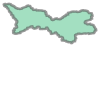

In [5]:
from shapely import wkb
a = query('select st_transform(basin,4326) from test.resultsshp where station_id=1;')
basin_shapely = wkb.loads(a[0][0],hex=True)
display(basin_shapely)

In [6]:
from parse import parse
b = query('''SELECT station_name,Box2D(ST_Transform(St_Buffer(St_Envelope(basin),50000),4326)) FROM test.resultsShp;''')
names = [i[0] for i in b]
boxes = [parse('BOX({west} {south},{east} {north})',i[1]) for i in b]
display(names,boxes)

dir(boxes)


cfgTemplate='''[extract]
reduceToBoundingBox.south={south}
reduceToBoundingBox.north={north}
reduceToBoundingBox.west={west}
reduceToBoundingBox.east={east}
'''.format(**boxes[1].named)

display(cfgTemplate)

with open('extractaSpain.cfg','w') as f:
    f.write(cfgTemplate)

['Genil', 'Guadalquivir', 'Viar', 'Guadiana menor', 'Guadajoz']

[<Result () {'west': '-5.88546625138583', 'south': '36.1793507989455', 'east': '-2.6503055642615', 'north': '38.4509491692973'}>,
 <Result () {'west': '-7.61397475837102', 'south': '35.9238822057239', 'east': '-1.482568793141', 'north': '39.4309756350471'}>,
 <Result () {'west': '-6.89592620635699', 'south': '37.0833966829251', 'east': '-5.0282253207746', 'north': '38.8206281290504'}>,
 <Result () {'west': '-4.19872155455723', 'south': '36.5765968080046', 'east': '-1.50660798868447', 'north': '38.5583515729104'}>,
 <Result () {'west': '-5.4421399343881', 'south': '36.805274629588', 'east': '-3.15367438164588', 'north': '38.440063807852'}>]

'[extract]\nreduceToBoundingBox.south=35.9238822057239\nreduceToBoundingBox.north=39.4309756350471\nreduceToBoundingBox.west=-7.61397475837102\nreduceToBoundingBox.east=-1.482568793141\n'

## Intersecting with netcdf data

## Creating cfg file for download

## Getting all variables for all basins using fimex

In [7]:
#Getting all boundaries to download:

from pathlib import Path
from tqdm import tqdm
import datetime

with Connection('localhost') as c:
    c.local('rm -rf /home/jovyan/Guadalquivir')
    c.local('mkdir /home/jovyan/Guadalquivir')

pathlist = Path('/home/jovyan/europe/').glob('**/*.nc')

start = datetime.datetime.strptime("01-01-1990", "%d-%m-%Y")
end = datetime.datetime.strptime("31-12-1990", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
download_dir = '/home/jovyan/europe'
filelist = ['{}/europe_{}.nc'.format(download_dir,date.strftime('%d-%m-%Y')) for date in date_generated]


for path in tqdm(pathlist) : #filelist):
    while True:
        path_in_str = str(path)
        output =  path_in_str.split('_')[1].split('.')[0].split('-')
        output = '_'.join([output[i] for i in [2,1,0]]) + '.nc'
        if not os.path.isfile('/home/jovyan/Guadalquivir/{}'.format(output)):
            try :
                with Connection('localhost') as c:
                    bla = c.local("fimex-1.3 -c extractaSpain.cfg --input.file {} --output.file /home/jovyan/Guadalquivir/{}".format(path_in_str,output,replace_env=False))
#                     display(bla)
            except :
                continue
        else:
            break
            


4368it [12:29,  5.55it/s]


In [8]:
folder = '/home/jovyan/test/'
with Connection('localhost') as c:
    c.local('rm -rf {}'.format(folder))
    c.local('mkdir {}'.format(folder))
    c.local('cp -r /home/jovyan/Guadalquivir/*.nc {}'.format(folder))

def expandDim(file): #Expanding time dimension in individual nc file to be able to concatenate them
    #display('Processing file {}'.format(file))
    while True:
        try:
            with Connection('localhost') as c:
                c.local('ncks -O --mk_rec_dmn time {} out.nc'.format(file))
                c.local('mv out.nc {}'.format(file))
        except:
            continue
        break
        

pathlist = Path(folder).glob('**/*.nc')
for path in tqdm(pathlist):
     expandDim(str(path))
        
with Connection('localhost') as c:
    c.local("ncrcat -O {}*.nc ./Guadalquivir.nc".format(folder))
    

4368it [05:45, 12.63it/s]
ncrcat: INFO/WARNING Multi-file concatenator encountered packing attribute scale_factor for variable d2m. NCO copies the packing attributes from the first file to the output file. The packing attributes from the remaining files must match exactly those in the first file or data from subsequent files will not unpack correctly. Be sure all input files share the same packing attributes. If in doubt, unpack (with ncpdq -U) the input files, then concatenate them, then pack the result (with ncpdq). This message is printed only once per invocation.


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


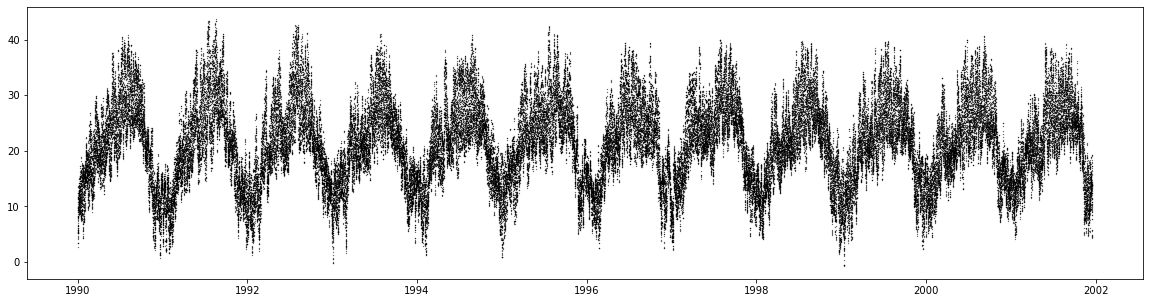

In [9]:
weatherFile = os.path.abspath('./Guadalquivir.nc')

nc_data = xr.open_dataset(weatherFile,chunks={'time':1000})
temperature = nc_data.t2m - 272.15

time = nc_data.time
nc_shape = temperature.shape
nc_data.close()
plt.figure(num=None, figsize=(20, 5))
plt.plot(time,temperature[:,0,0],'k.',markersize=0.5)


## Intersecting basin and nc file 

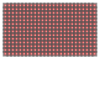

In [10]:
# Creating a grid from the nc file

temperatureFile = weatherFile #'./'/home/jose-luis/Downloads/hist_CNRM_CCLM_RR_daily_mm_1971.nc
nc_data = xr.open_dataset(temperatureFile)
#temperature = nc_data.precipitation__map_hist_daily
temperature = nc_data.t2m
nc_shape = temperature.shape
X = nc_data.longitude.values
Y = nc_data.latitude.values
nc_data.close()

#Y=Y[0]

cnt = 0
grid = list()
for i in X:
    for j in Y:
        left = i-0.125
        right = i+0.125
        bottom = j-0.125
        top = j+0.125
        p1 = Point(left,bottom)
        p2 = Point(left,top)
        p3 = Point(right,top)
        p4 = Point(right,bottom)
        pointList = [p1,p2,p3,p4,p1]
        poly = Polygon([[p.x,p.y] for p in pointList])
        poly.sid = cnt 
        grid.append(poly)
        cnt += 1

grid = MultiPolygon(grid)  
display(grid)


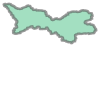

In [12]:
import geopandas as gp
from shapely.ops import cascaded_union,unary_union
basin_shapely = cascaded_union([basin_shapely.buffer(0)])
gridi = cascaded_union(grid)
display(gridi.intersection(basin_shapely))

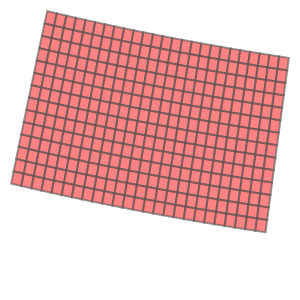

In [13]:
transform = True
if transform:
    import pyproj
    from shapely.ops import transform

    project = pyproj.Transformer.from_proj(
        pyproj.Proj(init='epsg:4326'), # source coordinate system
        pyproj.Proj(init='epsg:3035')) # destination coordinate system

    grid = transform(project.transform, grid) 
    display(grid)

In [14]:
# Uploading the grid to the geodatabase
sql = '''UPDATE test.resultsshp SET basin = ST_MakeValid(basin); 
DROP TABLE IF EXISTS test.dataBoundaries;
CREATE TABLE test.dataBoundaries(sid SERIAL PRIMARY KEY, boundary geometry(MULTIPOLYGON, 3035) );
INSERT INTO test.dataBoundaries(boundary) VALUES (ST_SetSRID('{hexStr}'::geometry,3035));
DROP INDEX IF EXISTS test_data_boundary_gix;
CREATE INDEX test_data_boundary_gix ON test.dataBoundaries USING GIST(boundary);
DROP INDEX IF EXISTS test_basins_gix;
CREATE INDEX test_basins_gix ON test.resultsShp USING GIST(basin);
'''.format(hexStr=grid.wkb_hex)

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geosvalbard -f sql.sql')
basin.connection.run('rm sql.sql')

UPDATE 5


psql:sql.sql:2: NOTICE:  table "databoundaries" does not exist, skipping


DROP TABLE
CREATE TABLE


psql:sql.sql:5: NOTICE:  index "test_data_boundary_gix" does not exist, skipping


INSERT 0 1
DROP INDEX


psql:sql.sql:7: NOTICE:  index "test_basins_gix" does not exist, skipping


CREATE INDEX
DROP INDEX
CREATE INDEX


<Result cmd='rm sql.sql' exited=0>

In [15]:
# Intersecting grid with basin and getting area of the intersection
station = "Guadalquivir"
sql = '''
DROP TABLE IF EXISTS test_dump;
CREATE TABLE test_dump AS
SELECT (ST_Dump(boundary)).path[1] as sid, (ST_Dump(boundary)).geom as geom
FROM test.dataBoundaries;

CREATE INDEX dump_idx ON test_dump USING GIST(geom);

DROP TABLE IF EXISTS subdivided_geoms;
CREATE TABLE subdivided_geoms AS
SELECT ST_Subdivide(basin,32) AS geom
FROM test.resultsShp
WHERE station_name ='{}';

CREATE INDEX subdivided_idx ON test_dump USING GIST(geom);

DROP TABLE IF EXISTS test.areas;
CREATE TABLE test.areas AS
WITH biglim AS (
    SELECT a.sid,ST_Area(ST_Intersection(b.geom, a.geom)) AS area FROM  test_dump AS a, subdivided_geoms AS b
    WHERE ST_Intersects(a.geom,b.geom)
) 
SELECT sid,SUM(area) as area FROM biglim
GROUP BY sid;

GRANT SELECT ON ALL TABLES IN SCHEMA test TO jovyan;
'''.format(station)

with open('sql.sql','w') as bla:
    bla.write(sql)

basin.connection.put('sql.sql')
basin.connection.run('psql -d geosvalbard -f sql.sql')
basin.connection.run('rm sql.sql')

areas = query('SELECT * from test.areas;')

DROP TABLE


psql:sql.sql:2: NOTICE:  table "test_dump" does not exist, skipping


SELECT 350
CREATE INDEX
DROP TABLE


psql:sql.sql:9: NOTICE:  table "subdivided_geoms" does not exist, skipping


SELECT 2684


psql:sql.sql:17: NOTICE:  table "areas" does not exist, skipping


CREATE INDEX
DROP TABLE
SELECT 130
GRANT


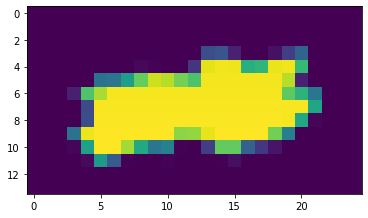

In [16]:
#Getting weight array from area file
#weights = pd.read_csv( os.path.join(geoResultsFolder,'areas.txt'),delimiter=';', header=None, names=['idx','area'])

idx = [i[0] for i in areas] #weights.idx.values
weight = [i[1] for i in areas] #weights.area.values
#Getting the in a 2d array
weightArray = np.zeros((nc_shape[1:]))
arrayIdx = np.unravel_index(idx,nc_shape[2:0:-1])
for i,j,k in zip(arrayIdx[1],arrayIdx[0],weight):
    weightArray[i][j] = k;

plt.imshow(weightArray)

In [17]:
np.savetxt('{}_weights.txt'.format(station),weightArray)

array(['1990-01-01T00:00:00.000000000', '1990-01-01T01:00:00.000000000',
       '1990-01-01T02:00:00.000000000', ...,
       '2001-12-16T21:00:00.000000000', '2001-12-16T22:00:00.000000000',
       '2001-12-16T23:00:00.000000000'], dtype='datetime64[ns]')

array(['1990-01-01T00:00:00.000000000', '1990-01-01T01:00:00.000000000',
       '1990-01-01T02:00:00.000000000', ...,
       '2001-12-16T21:00:00.000000000', '2001-12-16T22:00:00.000000000',
       '2001-12-16T23:00:00.000000000'], dtype='datetime64[ns]')

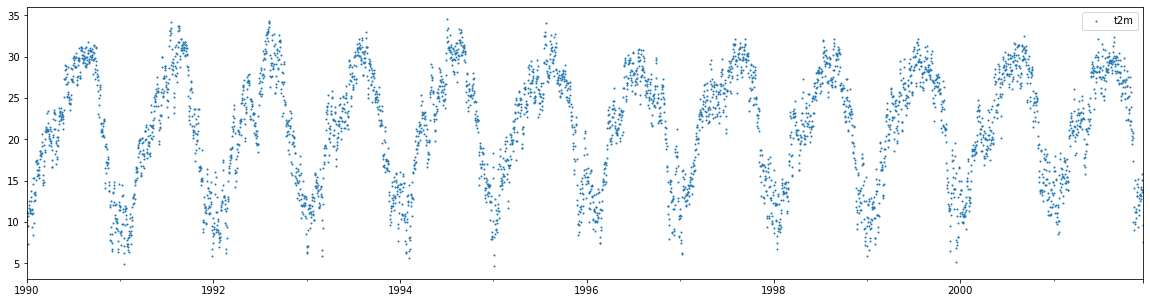

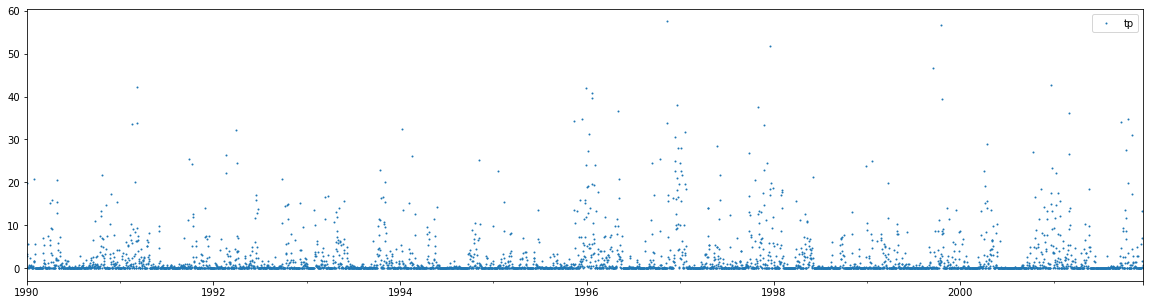

In [18]:
# Getting area-weighted data
import datetime

def getWeightedData(filename,variable,save=True,isTemperature=False):
    nc_data = xr.open_dataset(filename,chunks={'time':1000})
    time = nc_data.time.values
    display(time)
    total_weight = sum(weight)
    data = np.sum(np.sum((nc_data.variables[variable] * weightArray)/total_weight,axis=1),axis=1)
    if isTemperature:
        data-=272.15
    data_df = pd.DataFrame({variable:data},index=time)
    if save:
        data_df.to_pickle('./{}_era5.pickle'.format(variable))
        data_df.to_csv('./{}_era5.csv'.format(variable))
    nc_data.close()
    return data_df

def getInterpolatedData(filename,variable,save=True,isTemperature=False):
    nc_data = xr.open_dataset(filename,chunks={'time':1000})
    time = nc_data.time.values
    data = nc_data.variables[variable].values.flatten()
    if isTemperature:
        data-=272.15
    data_df = pd.DataFrame({variable:data},index=time)
    if save:
        data_df.to_pickle('./{}_era5.pickle'.format(variable))
        data_df.to_csv('./{}_era5.csv'.format(variable))
    nc_data.close()
    return data_df

temperature_df = getWeightedData(weatherFile,'t2m',save=False,isTemperature=True)
temperature_df.index = temperature_df.index + datetime.timedelta(hours=8)
temperature_df = temperature_df.resample('D').mean()
temperature_df.plot(figsize=(20,5), marker = '.', linestyle='None', markersize=2)
fig=plt.gcf()
fig.savefig('temperature_era5.png')

rain_df = getWeightedData(weatherFile,'tp',save=False)
rain_df.index = rain_df.index + datetime.timedelta(hours=8)
rain_df = rain_df.resample('D').sum()
rain_df = rain_df * 1000.0;
rain_df.loc[rain_df['tp'] > 100.0, 'tp'] = 0.0
rain_df.plot(figsize=(20,5), marker = '.', linestyle='None', markersize=2)
fig=plt.gcf()
fig.savefig('rain_era5.png')

rain_df.to_csv("{}_rain_era5.csv".format(station))
temperature_df.to_csv("{}_temperature_era5.csv".format(station))

In [ ]:
bla = getWeightedData(weatherFile,'t2m',save=False,isTemperature=True)
bla.loc[datetime.datetime(1989,1,1):datetime.datetime(1989,12,31)].plot(figsize=(15,5))


In [ ]:
svalbardScript='''#! /bin/bash
pgsql2shp -f "./basin_guadalquivir.shp" -h localhost geosvalbard "SELECT *, st_area(basin) as  basinArea FROM test.resultsshp
where station_id=2;"
'''

with open('script.sh','w') as bla:
    bla.write(svalbardScript)
with Connection(host=basin.properties['ip'],
                       user=basin.properties['username'],
                       connect_kwargs={"key_filename": basin.properties['keyFile']},
                       ) as c:
    c.put('script.sh')
    c.run('chmod +x script.sh')
    c.run('./script.sh')
    c.run('tar -cf  Guadalquivir.tar basin_guadalquivir.*')
    c.get('Guadalquivir.tar')
    c.run('rm basin_guadalquivir*')
    c.run('rm script.sh')